In [2]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Paths
train_dir = '/Users/sukanya/Documents/Alziemers Multi Modal/Split Dataset/train'  
test_dir = '/Users/sukanya/Documents/Alziemers Multi Modal/Split Dataset/test'

# Loading Images and Labels

In [4]:
#  Loading images and label
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),  
    batch_size=32,         
    label_mode='int',       
    shuffle=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

Found 795 files belonging to 4 classes.
Found 201 files belonging to 4 classes.


In [5]:
# Class Names
class_names = train_dataset.class_names
print("Class names:", class_names)

Class names: ['Mild Dementia', 'Moderate Dementia', 'No Dementia', 'Severe Dementia ']


## Normalizing Images

In [6]:
# Normalize the image data
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [7]:
input_shape = (256, 256, 3)

# InceptionV3 For Image Classification

In [8]:
# Base model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import Model

base_model = InceptionV3(weights='imagenet', include_top=False)

for layer in base_model.layers:
    layer.trainable = False

In [9]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.25)(x)
predictions = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

In [11]:

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
# Training the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10 
)

Epoch 1/10
25/25 [==============================] - 18s 653ms/step - loss: 0.9799 - accuracy: 0.6226 - val_loss: 0.5985 - val_accuracy: 0.7711
Epoch 2/10
25/25 [==============================] - 15s 608ms/step - loss: 0.5201 - accuracy: 0.8025 - val_loss: 0.3693 - val_accuracy: 0.8955
Epoch 3/10
25/25 [==============================] - 15s 612ms/step - loss: 0.3705 - accuracy: 0.8692 - val_loss: 0.3732 - val_accuracy: 0.8358
Epoch 4/10
25/25 [==============================] - 15s 614ms/step - loss: 0.2480 - accuracy: 0.9296 - val_loss: 0.1973 - val_accuracy: 0.9502
Epoch 5/10
25/25 [==============================] - 16s 625ms/step - loss: 0.1667 - accuracy: 0.9648 - val_loss: 0.1555 - val_accuracy: 0.9602
Epoch 6/10
25/25 [==============================] - 15s 616ms/step - loss: 0.1273 - accuracy: 0.9711 - val_loss: 0.1088 - val_accuracy: 0.9900
Epoch 7/10
25/25 [==============================] - 15s 612ms/step - loss: 0.0926 - accuracy: 0.9874 - val_loss: 0.0882 - val_accuracy: 0.9900

## Model Metrics

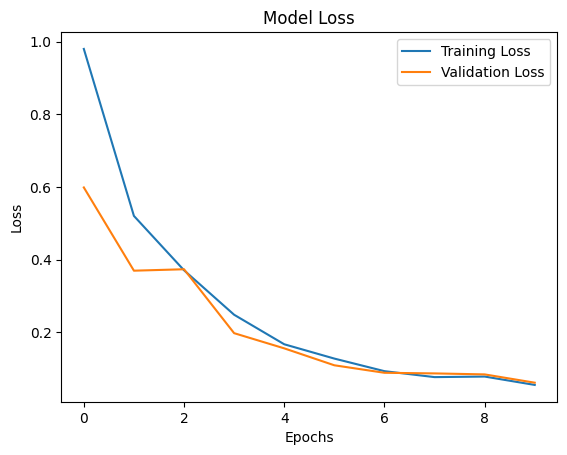

In [13]:
# Training & validation loss 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

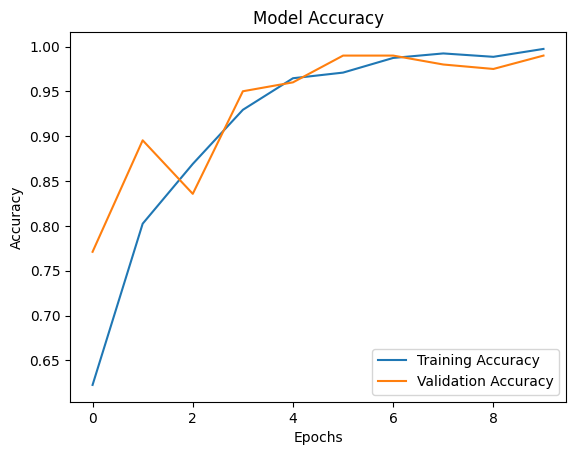

In [14]:
# Training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Metrics
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Loss: {final_train_loss}")
print(f"Final Validation Loss: {final_val_loss}")
print(f"Final Training Accuracy: {final_train_acc}")
print(f"Final Validation Accuracy: {final_val_acc}")

Final Training Loss: 0.05476414039731026
Final Validation Loss: 0.06091439723968506
Final Training Accuracy: 0.9974842667579651
Final Validation Accuracy: 0.9900497794151306


7/7 [==============================] - 4s 473ms/step


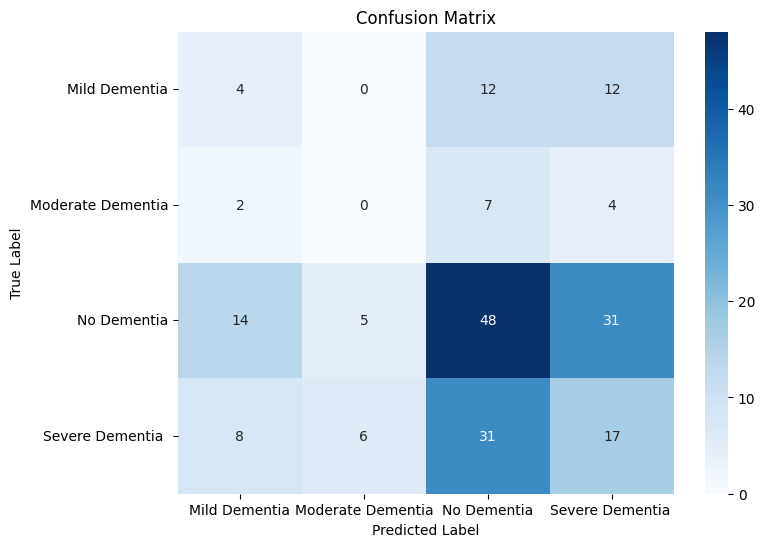

In [16]:
# Confusion Matrix
y_pred = np.argmax(model.predict(test_dataset), axis=-1)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()